### Treść zadania

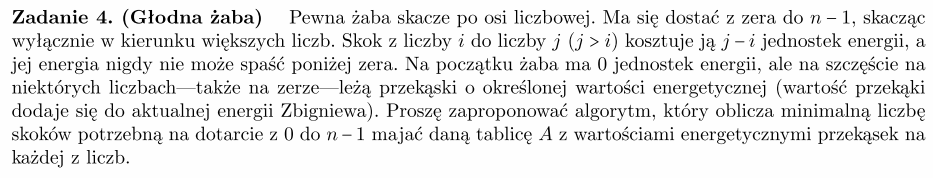

### Omówienie algorytmu

###### Bottom-up:
- Wypełniamy początkowo tablicę $ F $ o wymiarach $ n \times n $ wartościami $ \infty $, które interpretujemy jako brak możliwości dotarcia do danego pola o indeksie $ i $ (numer kolumny), posiadając dokładnie $ k $ pozostałej energii (numer wiersza),
- Wypełniamy pola, do których możemy dotrzeć z początkowego pola, posiadając przy tym odpowiednią pozostałą wartość energii, jedynkami. Tzn. np. na pierwszym polu (o indeksie 0) dostajemy 2 energii, więc możemy skoczyć na pole o indeksie $ 0 + 2 = 2 $ i zostanie nam $ 2 - 2 = 0 $ energii, więc zapisujemy $ F[2][0] = 1 $ lub możemy skoczyć na pole $ 0 + 1 = 1 $ i zostanie nam $ 2 - 1 = 1 $ energii, więc zapisujemy $ F[1][1] = 1 $,
- Ostatnim krokiem jest wypełnienie pozostałej części tablicy. Wystarczy przejść w pętli przez kolejne kolumny w kolejnych wierszach (począwszy od kolumny o indeksie 1, bo nie ma sensu zaglądać do kolumny o indeksie 0, odpowiadającej początkowemu położeniu, bo już je rozważyliśmy wyżej) i dla każdego pola $ F[i][j] $, dla którego zachodzi warunek $ F[i][j] \lt \infty $ (co interpretujemy jako fakt, iż możemy dotrzeć do tego pola, wykonując dokładnie $ F[i][j] $ skoków), wyznaczamy wszystkie pola, do których możemy dotrzeć oraz liczbę potrzebnych do tego skoków. Można zauważyć, że jeżeli sprawdzamy pewną komórkę $ F[i][j] $, oznacza to, że w danym momencie znajdujemy się na polu o indeksie $ j $ w tablicy wejściowej $ A $ i mamy w tym momencie dokładnie $ i $ energii do dyspozycji pozostałej po ostatnim skoku na to pole. W takiej sytuacji, nasza łączna energia w danym momencie wynosi $ i + A[i] $, bo należy jeszcze doliczyć energię zebraną na danym polu. Możemy więc skoczyć o maksymalnie $ i + A[i] $ pól w prawo, chyba, że wyskoczylibyśmy poza zakres. Musimy więc zawsze zredukować energię do maksymalnej potrzebnej do dotarcia na ostatnie pole, a więc zamiast sprawdzać wszystkie kolejne energie, jakie możemy wykorzystać na pojedynczy skok, redukujemy maksymalną wartość do $ min(n - 1 - j, A[j] + i) $. Wówczas dla każdego pola, na które możemy skoczyć, wyznaczamy minimalną liczbę skoków.

###### Top-down:
W tym podejściu tworzymy funkcję rekurencyjną postaci: <br>
$ f(i, e) $ - minimalna liczba skoków, jakie należy wykonać, będąc na polu $ i $, posiadając dokładnie $ e $ punktów energii po zjedzeniu przekąski z tego pola, aby dotrzeć do pola o indeksie $ n - 1 $ (ostatniego pola). (Wartość $ \infty $ oznacza brak możliwości dotarcia z danego pola do końca).
<br><br>
- W tym podejściu wystarczy wymyślić funkcję, od której zależy liczba skoków i spamiętywać kolejne wyniki. Podobnie jak wyżej, tworzymy tablicę $ F $ o wymiarach $ n \times n $ (ponownie ograniczamy maksymalną energię do $ n - 1 $, bo więcej nam nie potrzeba, w której kolejne wiersze oznaczają pozostałą energię, jaką mamy, po zjedzeniu przekąski z danego pola, a numery wierszy ($ i $) - oznaczają indeks pola, na którym się znajdujemy. Rozwiązaniem będzie $ F[A[0]][0] $, gdzie $ A $ jest tablicą wartości energetycznej przekąsek (na początkowym polu jemy przekąskę z tego pola, więc uzyskujemy energię $ A[0] $), <br>
- Funkcja rekurencyjna wygląda następująco:

    for u in range(1, min(e + 1, n - i)):
        F[e][i] = min(F[e][i], jump(i + u, e - u + A[i + u]) + 1)

Oznacza to tyle, że przechodzimy przez wszystkie możliwe do zużycia wartości energii (zaczynamy od 1, bo zużycie 0 energii oznaczałoby pozostanie na bieżącym polu, a tego nie chcemy), aż do posiadanej w danym momencie wartości energii $ e $ (w pętli jest $ e + 1 $, bo funkcja $ range $ usuwa ostatni element) lub aż do chwili, gdy potrzebujemy jeszcze energii, aby dostać się do statniego pola (tzn. jeżeli mamy więcej energii niż liczba pozostałych do pokonania pól, możemy pozbyć się części energii, bo jest nam ona niepotrzebna, a jej zachowanie, spowodowałoby konieczność utworzenia niepotrzebnie dużej tablicy do zapamiętywania wartości funkcji $ f $). Przy pomocy funkcji minimum, wyznaczamy minimalną liczbę skoków z bieżącego pola $ i $, mając $ e $ energii na pole o indeksie $ i + u $ (gdzie $ u $ jest zużytą energią), na którym będziemy mieli dokładnie $ e - u + A[i + u] $ energii, bo stracimy $ u $ na skok $ u $ pól w prawo i zyskamy $ A[i + u] $, poprzez zjedzenie przekąski na polu, na które wskoczymy). Musimy jeszcze dodać 1, bo wykonujemy 1 skok na nowe pole.

### Złożoność

###### Obliczeniowa:
$ O(n^3) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

#### Bottom-up

In [1]:
def zbigniew(A):
    n = len(A)
    INF = float('inf')
    F = [[INF] * n for _ in range(n)]
    
    # Fill the first column with zeros (no jumps required to get to the srarting
    # point as we are already there)
    for j in range(n):
        F[j][0] = 0
        
    # Set number of jumps required to get to the 'i'th field having still 'A[0] - i'
    # energy remaining with ones (one jump required). This is essential step as we
    # can go only tho these fields from the beginning one.
    for i in range(A[0]):
        F[i][A[0] - i] = 1
        
    # Fill the remaining fields of an array with appropriate values (minimum
    # number of steps required to get to such a field with the certain amount of
    # energy remaining).
    for i in range(n):
        for j in range(1, n):
            if F[i][j] < INF:
                energy = min(A[j] + i, n - 1 - j)
                # k is the remaining energy
                for k in range(energy):
                    # Limit an energy to the max value essential to reach the end
                    # (This step is required in order not to go out of the bounds
                    # of the F matrix (and to limit the memory required to cache values))
                    next_j = j + energy - k
                    # Store the minimum steps required to get to the 'next_j' index
                    F[k][next_j] = min(F[k][next_j], F[i][j] + 1)
    
    print(*F, sep='\n')
    return F[0][n - 1]

###### Kilka testów

In [2]:
A = [2, 2, 1, 0, 0, 0]
print(zbigniew(A))

[0, inf, 1, 2, 2, 3]
[0, 1, inf, 2, 3, inf]
[0, inf, 2, 3, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
3


In [3]:
A = [2, 3, 1, 1, 2, 0]
print(zbigniew(A))

[0, inf, 1, 2, 3, 2]
[0, 1, inf, inf, 2, inf]
[0, inf, inf, 2, inf, inf]
[0, inf, 2, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
2


#### Top-down

In [4]:
def zbigniew(A):
    n = len(A)
    INF = float('inf')
    F = [[INF] * n for _ in range(n)]
    
    def jump(i, e):
        if i == n - 1: return 0
        if F[e][i] == INF:
            for u in range(1, min(e + 1, n - i)):
                F[e][i] = min(F[e][i], jump(i + u, e - u + A[i + u]) + 1)
            
        return F[e][i]
        
    jump(0, A[0])
    
    print(*F, sep='\n')
    
    return F[A[0]][0]

###### Kilka testów

In [5]:
A = [2, 2, 1, 0, 0, 0]
print(zbigniew(A))

[inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, 1, inf]
[3, inf, inf, 1, inf, inf]
[inf, 2, 1, inf, inf, inf]
[inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf]
3


In [6]:
A = [2, 3, 1, 1, 2, 0]
print(zbigniew(A))

[inf, inf, inf, inf, inf, inf]
[inf, inf, 3, 2, inf, inf]
[2, inf, inf, inf, 1, inf]
[inf, inf, inf, 1, 1, inf]
[inf, 1, 1, 1, 1, inf]
[inf, inf, inf, inf, 1, inf]
2
